In [1]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [2]:
pip install missingpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from sklearn.model_selection import train_test_split # Data split train/test
from sklearn.ensemble import RandomForestClassifier # RandomForest
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score # Metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV # Hiperparameter tunning

from missingpy import MissForest # Impute missing values


In [5]:
train = pd.read_csv("../Spaceship_Titanic/Data/train.csv")
test = pd.read_csv("../Spaceship_Titanic/Data/test.csv")


In [6]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
objects = train.select_dtypes(include='object')
boolean = train.select_dtypes(include='bool')
numbers = train.select_dtypes(include=['float', 'integer'])

### EDA

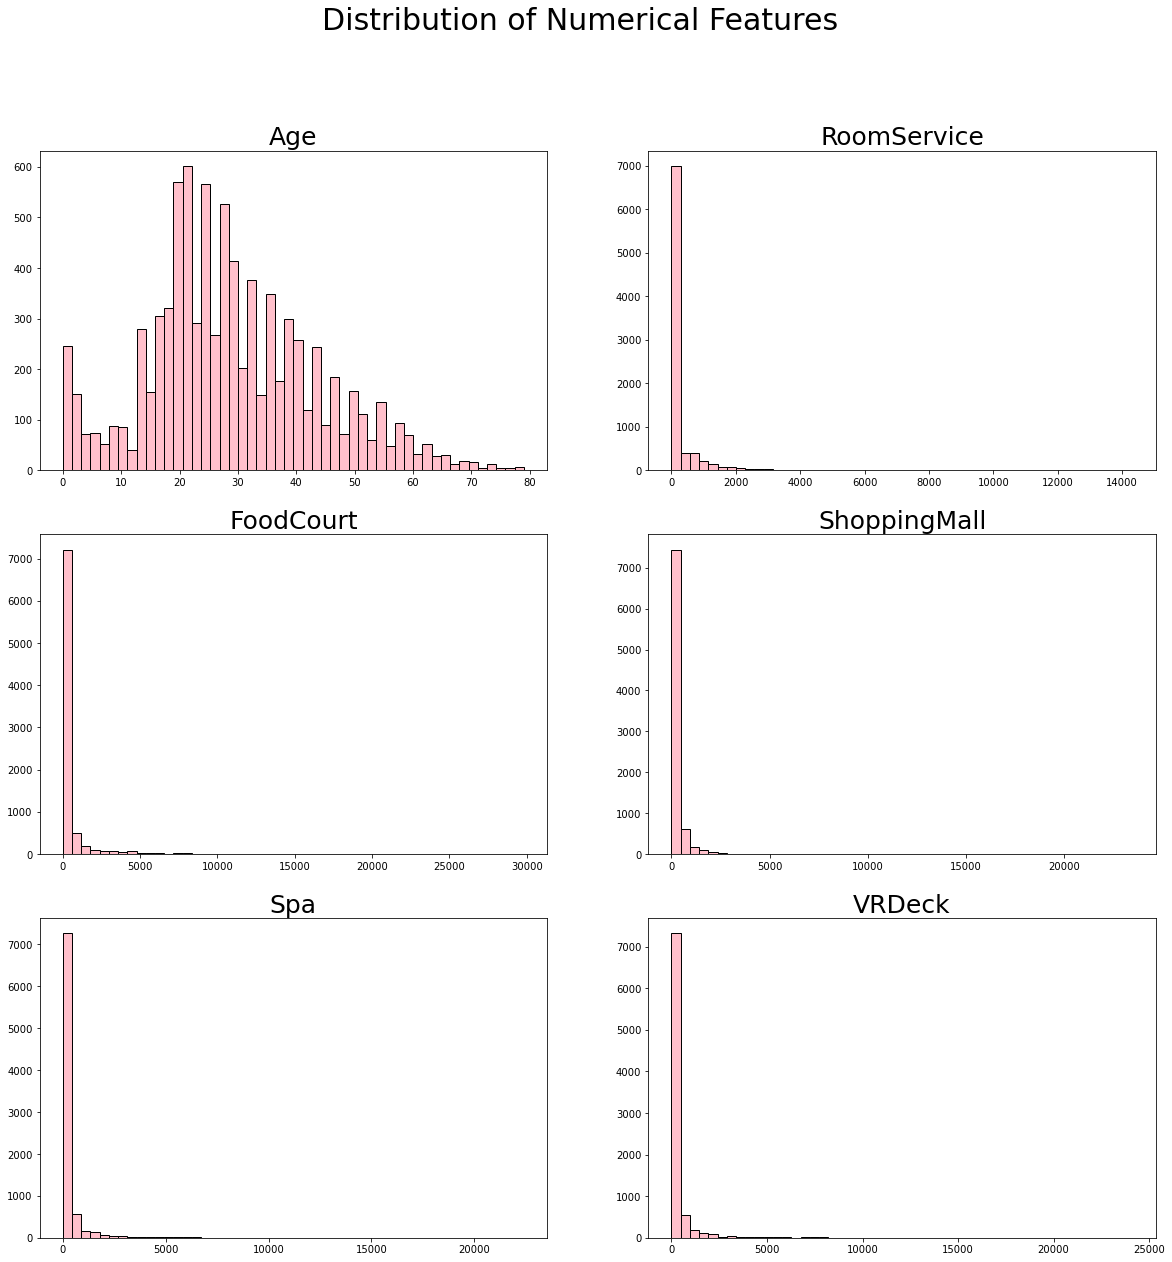

In [12]:
plt.figure(figsize=(20,20))
    
# Draw the plot
for count, feature in enumerate(numbers.columns.tolist()):
    ax = plt.subplot(round((len(numbers.columns)/2)+0.4)/2, 2, count+1)    
    ax.set_title("{}".format(feature), size = 25)
    ax.hist(numbers[feature],color = 'pink', edgecolor = 'black', bins = 50)
    
plt.suptitle("Distribution of Numerical Features", fontsize = 30);

In [13]:
objects

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [14]:
for i in objects.columns.tolist()[1:-1]:
    print(objects[i].describe(),"\n")

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object 

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object 

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object 

count            8511
unique              3
top       TRAPPIST-1e
freq             5915
Name: Destination, dtype: object 

count      8490
unique        2
top       False
freq       8291
Name: VIP, dtype: object 



C:\Users\Javi\AppData\Local\Temp\ipykernel_26372\1055120908.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


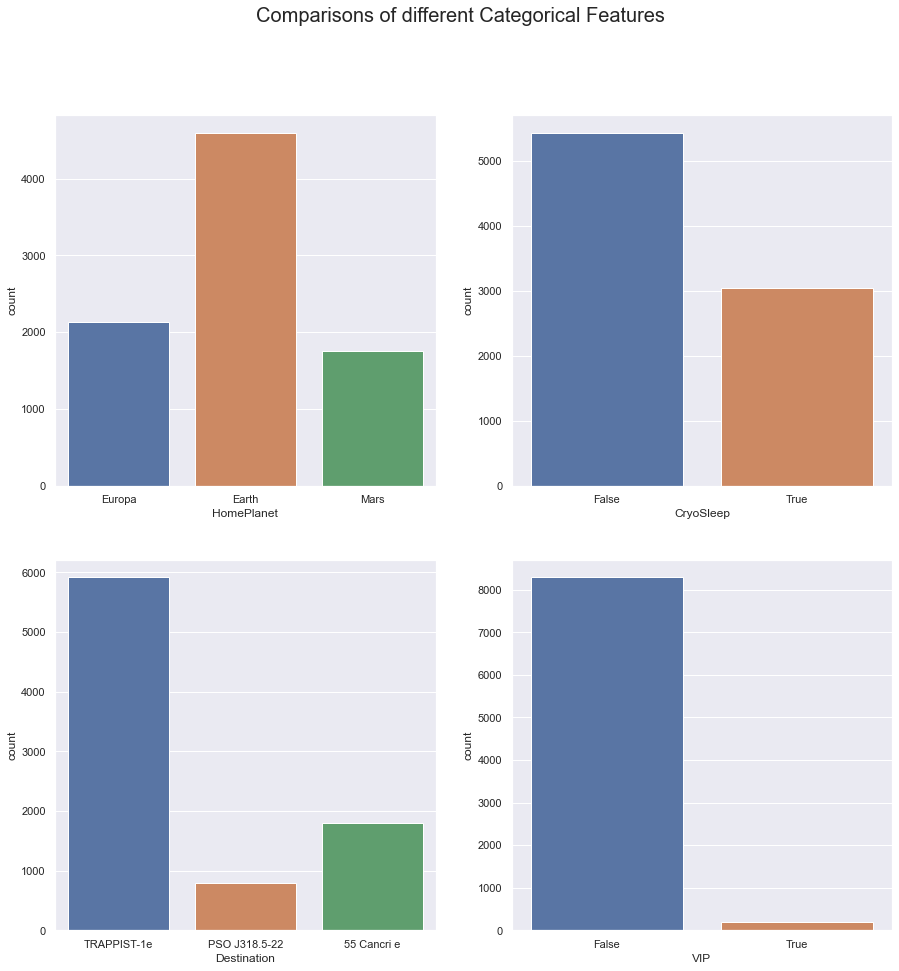

In [15]:
sns.set_theme(style="darkgrid")
fig, ax =plt.subplots(2, 2,figsize=(15, 15))
sns.countplot(x = 'HomePlanet', data = objects, ax=ax[0][0])
sns.countplot(x = 'CryoSleep', data = objects, ax=ax[0][1])
sns.countplot(x = 'Destination', data = objects, ax=ax[1][0])
sns.countplot(x = 'VIP', data = objects, ax=ax[1][1])
fig.suptitle('Comparisons of different Categorical Features', fontsize=20)
fig.show()

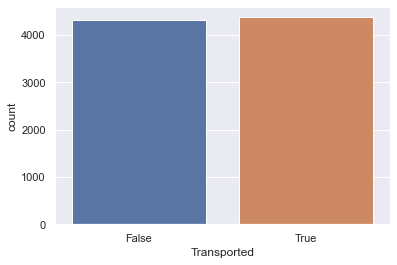

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(x = 'Transported', data = train);

### Feature Engineering

In [17]:
train['label'] = 'train'
test['label'] = 'test'

# Concat
concat_df = pd.concat([train , test])

In [18]:
concat_df['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
4272    G/1496/S
4273         NaN
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [19]:
#Extracting out the 'Cabin' column
concat_df['Cabin'].fillna(0, inplace=True)

deck = []
num = []
side = []

for i in range(len(concat_df['Cabin'])):
    if concat_df['Cabin'].iloc[i] == 0:
        result = [np.nan, np.nan, np.nan]
    else:
        result = concat_df['Cabin'].iloc[i].split('/')
    deck.append(result[0])
    num.append(result[1])
    side.append(result[2])
    
concat_df['Deck'] = deck
concat_df['Num'] = num
concat_df['Side'] = side

concat_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [20]:
onehotencoding = pd.get_dummies(concat_df.select_dtypes(include='object').drop(['Transported', 'label'], axis=1))
concat_df.drop(concat_df.select_dtypes(include='object').drop(['Transported', 'label'], axis=1), axis=1, inplace=True)
concat_set = pd.concat([concat_df, onehotencoding], axis=1)

# Split your data
train_df = concat_set[concat_set['label'] == 'train']
test_df = concat_set[concat_set['label'] == 'test']

# Drop your labels
train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)



In [25]:
# Impute
imputer = MissForest()
data_imputed = imputer.fit_transform(train_df.iloc[: , :6])
data_imputed = pd.DataFrame(data=data_imputed, columns=train_df.iloc[: , :6].columns)

data_imputed

c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 0


c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 1


c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 2


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [26]:
train_df.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace=True)
train_df = pd.concat([train_df, data_imputed], axis=1)
train_df.isna().sum()

Transported          0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
CryoSleep_False      0
                    ..
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Length: 1921, dtype: int64

In [27]:
train_df.Transported = train_df.Transported.astype(bool)

### Model

In [28]:
y = train_df['Transported']
X = train_df.drop('Transported', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

#Fitting the model
model.fit(X_train,y_train)

#Prediction
pred = model.predict(X_val)

#Evaluation
accuracy = accuracy_score(y_val, pred)
auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

#Statement
print("The accuracy is {} and roc_auc_score is {}".format(accuracy, auc))

The accuracy is 0.7891104294478528 and roc_auc_score is 0.865922122867372


In [36]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       False       0.78      0.79      0.79      1289
        True       0.79      0.79      0.79      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [37]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

matriz de confusión
[[1021  268]
 [ 282 1037]]
accuracy
0.7891104294478528
precision
0.7946360153256705
recall
0.7862016679302501
f1
0.7903963414634146
AUC
0.789144278495769


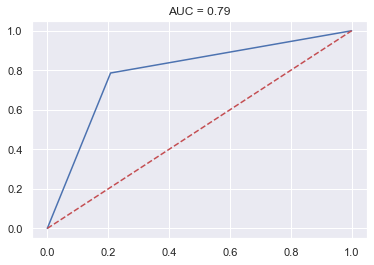

In [38]:
saca_metricas(y_val, pred)

In [40]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [70, 90, 110, 130],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100, 150, 200, 250, 300]
}
# Create a based model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [70, 90, 110, 130],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=2)

In [41]:
grid_search.best_params_

{'max_depth': 110,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [58]:
rf_model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators = 100, 
                               min_samples_split = 6, 
                               min_samples_leaf = 1,  
                               max_depth = 110, 
                               bootstrap = True)

#Fitting the model
rf_model.fit(X_train,y_train)

#Prediction
pred = rf_model.predict(X_val)

#Evaluation
improved_accuracy = accuracy_score(y_val, pred)
improved_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

improvement_in_accuracy = ((improved_accuracy-accuracy)/accuracy)*100
imporvement_in_auc = ((improved_auc-auc)/auc)*100

#Statement
print("After Hyperparameter Tuning, the accuracy is {} and roc_auc_score is {}".format(improved_accuracy, improved_auc))
print("Improvement in accuracy is {:.2f}% and in roc_auc_score is {:.2f}%".format(improvement_in_accuracy,imporvement_in_auc))

After Hyperparameter Tuning, the accuracy is 0.7917944785276073 and roc_auc_score is 0.865922122867372
Improvement in accuracy is 0.34% and in roc_auc_score is 0.00%


### Report

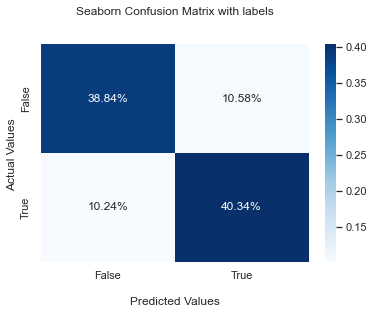

In [59]:
cf_matrix = confusion_matrix(y_val, pred)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

sns.set(rc={'figure.figsize':(10,10)})
## Display the visualization of the Confusion Matrix.
plt.show()

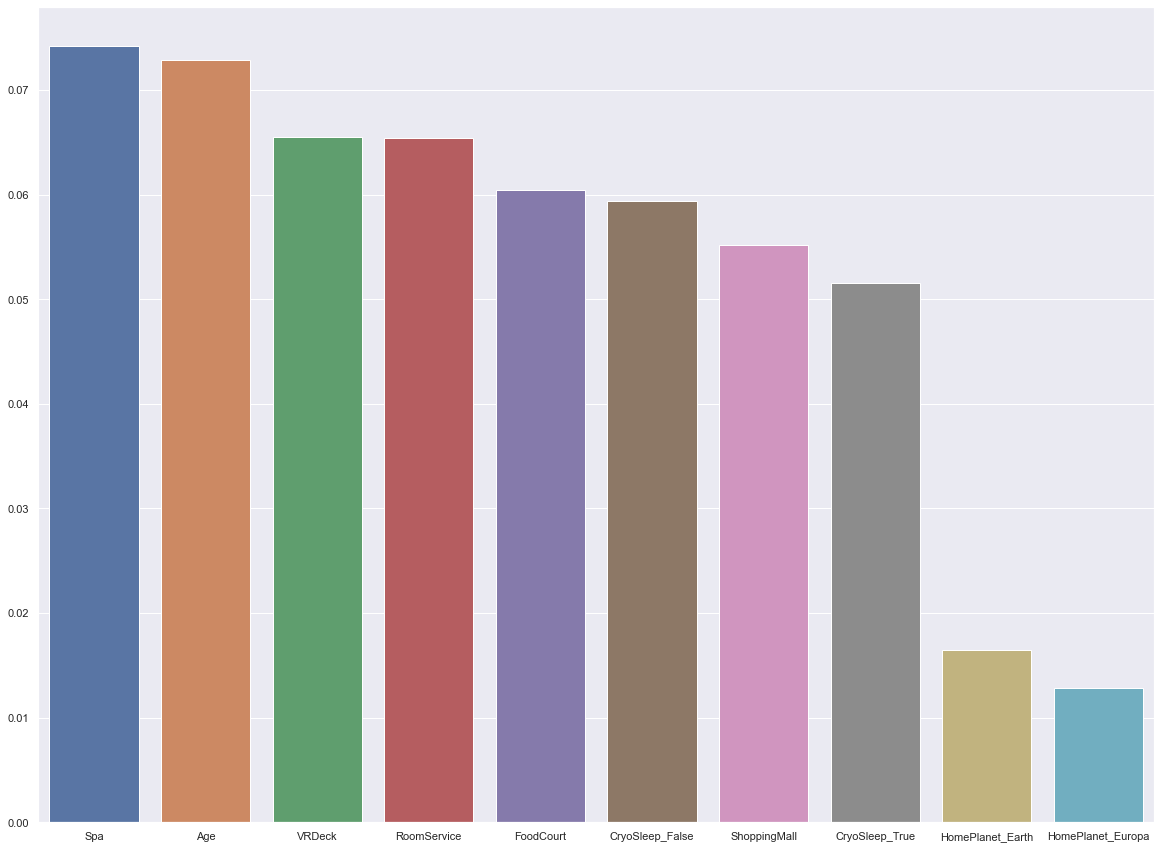

In [61]:
feats = {} 
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance
    
feature_importances = sorted(feats.items(), key=lambda x: x[1], reverse=True)

df = {"Feature": [], "Importance": []}
for i in feature_importances[:10]:
    df["Feature"].append(i[0])
    df['Importance'].append(i[1])
    
sns.set(rc={'figure.figsize':(20,15)})
sns.barplot(x='Feature', y='Importance', data = df);

### Submission

In [64]:
# Impute
imputer = MissForest()
data_imputed = imputer.fit_transform(test_df.iloc[: , :6])
data_imputed = pd.DataFrame(data=data_imputed, columns=test_df.iloc[: , :6].columns)
test_df.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace=True)
test_df = pd.concat([test_df, data_imputed], axis=1)

test_df.drop('Transported', axis=1, inplace=True)

c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 0


c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 1


c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 2


c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\Javi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

Iteration: 3


In [66]:
sample_df = pd.read_csv('sample_submission.csv')

In [67]:
#submission
rf_submission = rf_model.predict(test_df)

#submission file
sample_df['Transported'] = rf_submission
sample_df.to_csv('rf_submission.csv', index=False)

In [68]:
sample_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
